In [40]:
import anndata as ad
import scanpy as sc
import sys
sys.path.append("../utils") 
from helper_functions import get_obs_var_for_integrated, subset_nocontrols, subset_markers_tocorrect

In [67]:
def make_umap(adata, frac = 0.1, n_neighbors = 50, n_pcs = 10):
    adata = sc.pp.sample(adata, fraction=frac, rng=0, replace=False, copy=True)
    sc.pp.scale(adata, layer='integrated')
    sc.tl.pca(adata, layer='integrated', n_comps = n_pcs)
    sc.pp.neighbors(adata, use_rep = 'X_pca', n_neighbors= n_neighbors)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color = ['batch', 'cell_type', 'sample'], show=True, ncols=1)
    return

In [47]:
# Replace with the path to .h5ad locally
i_adata_s1 = ad.read_h5ad("../../../Downloads/intermediate_files/human_blood_mass_cytometry/method_out/harmonypy_split1.h5ad")
i_adata_s2 = ad.read_h5ad("../../../Downloads/intermediate_files/human_blood_mass_cytometry/method_out/harmonypy_split2.h5ad")
u_adata = ad.read_h5ad("../data/human_blood_mass_cytometry.h5ad")

In [ ]:
i_adata_s1, i_adata_s2 = get_obs_var_for_integrated(i_adata_s1, i_adata_s2, u_adata)
i_adata_s1 = subset_markers_tocorrect(i_adata_s1)
i_adata_s2 = subset_markers_tocorrect(i_adata_s2)

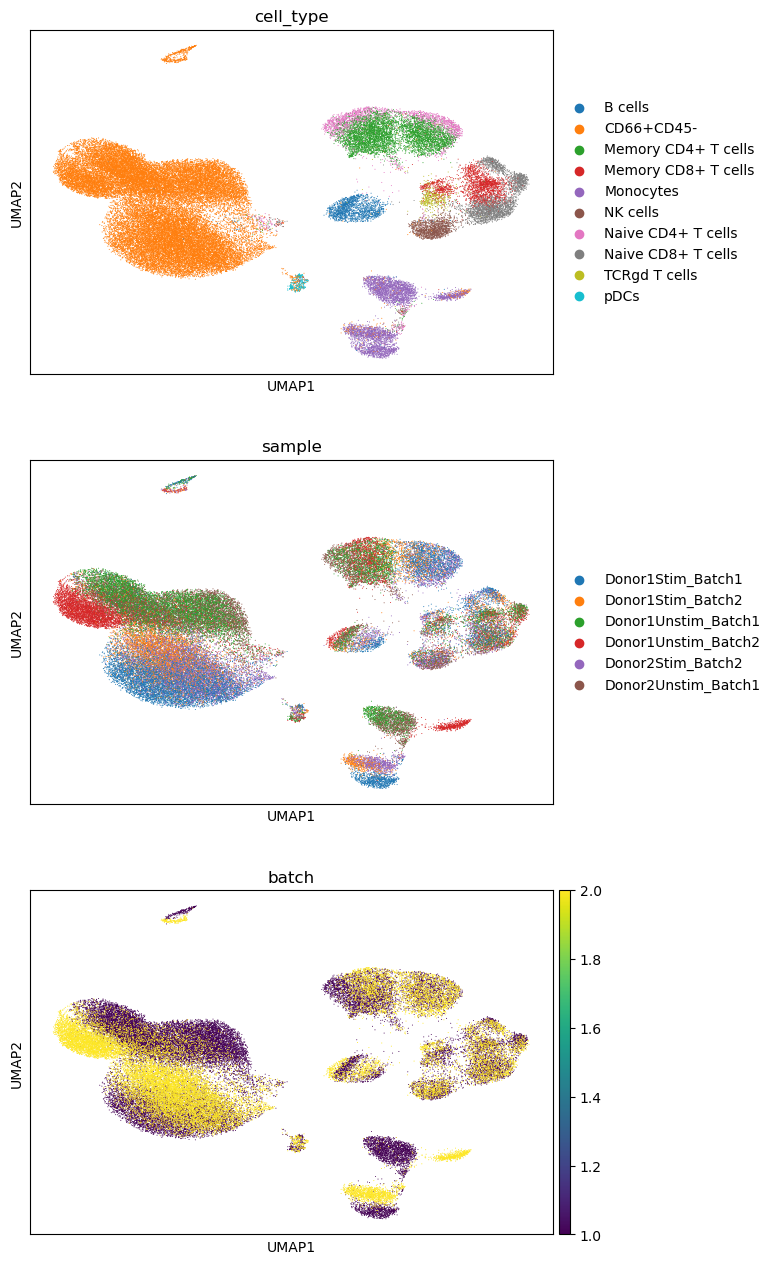

In [ ]:
make_umap(i_adata_s1)

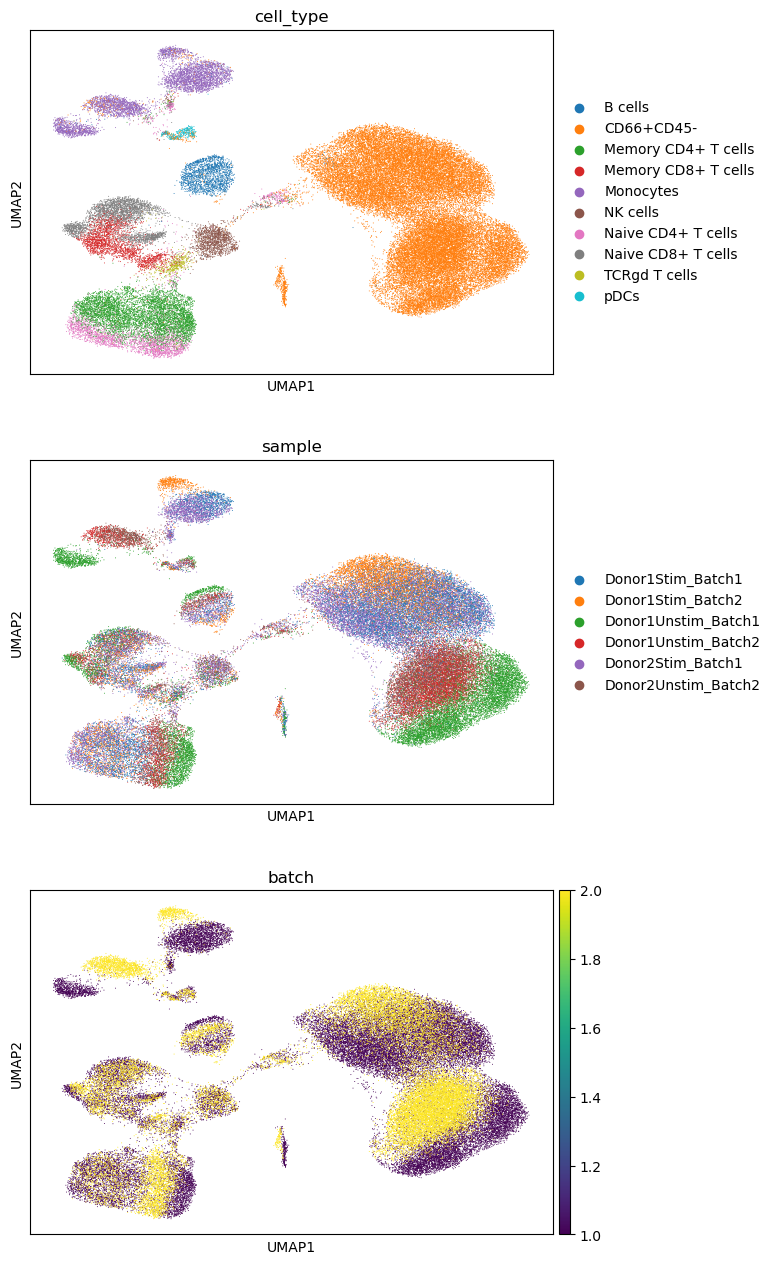

In [61]:
make_umap(i_adata_s2)

In [64]:
i_adata_case1 = ad.read_h5ad("../../../Downloads/intermediate_files/human_blood_mass_cytometry/method_out/cytonorm_no_controls_to_goal_split1.h5ad")
i_adata_case2 = ad.read_h5ad("../../../Downloads/intermediate_files/human_blood_mass_cytometry/method_out/cytonorm_all_controls_to_mid_split2.h5ad")
u_adata = ad.read_h5ad("../data/human_blood_mass_cytometry.h5ad")
i_adata_case1, i_adata_case2 = get_obs_var_for_integrated(i_adata_case1, i_adata_case2, u_adata)
i_adata_case1 = subset_markers_tocorrect(i_adata_case1)
i_adata_case2 = subset_markers_tocorrect(i_adata_case2)

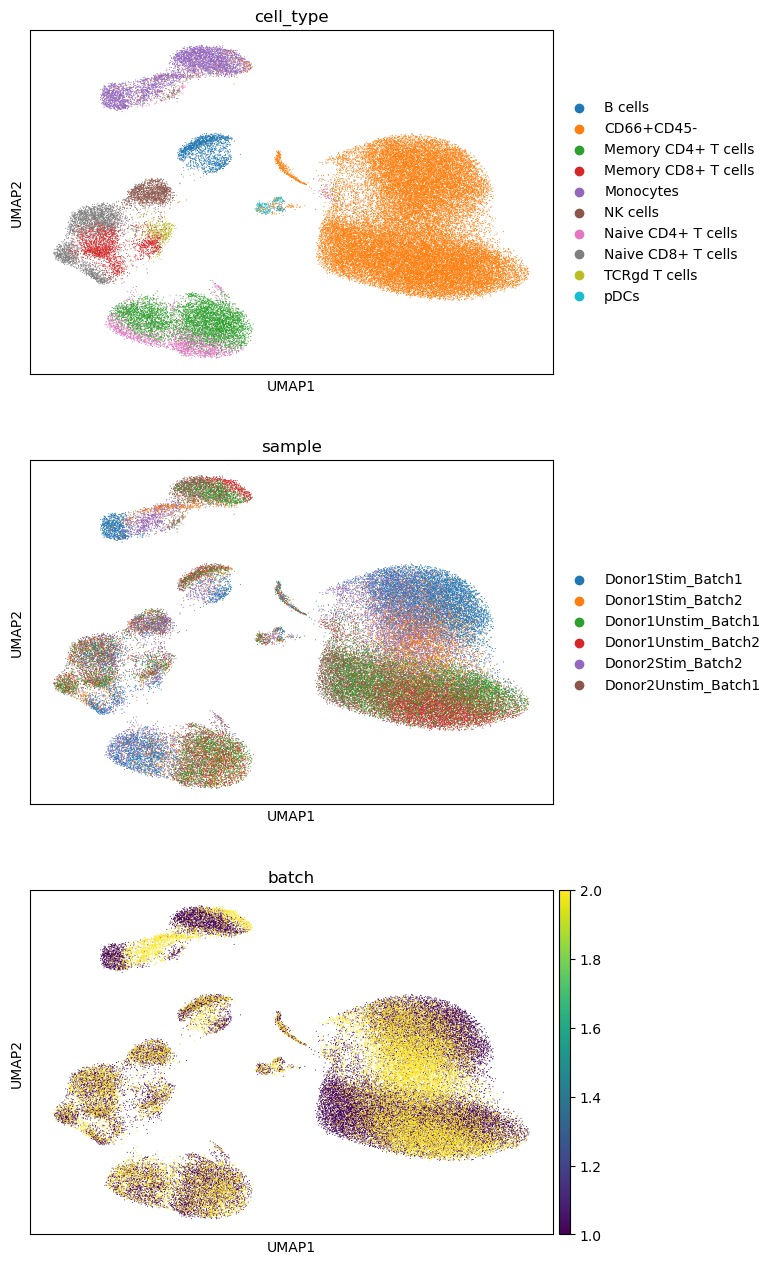

In [65]:
make_umap(i_adata_case1)

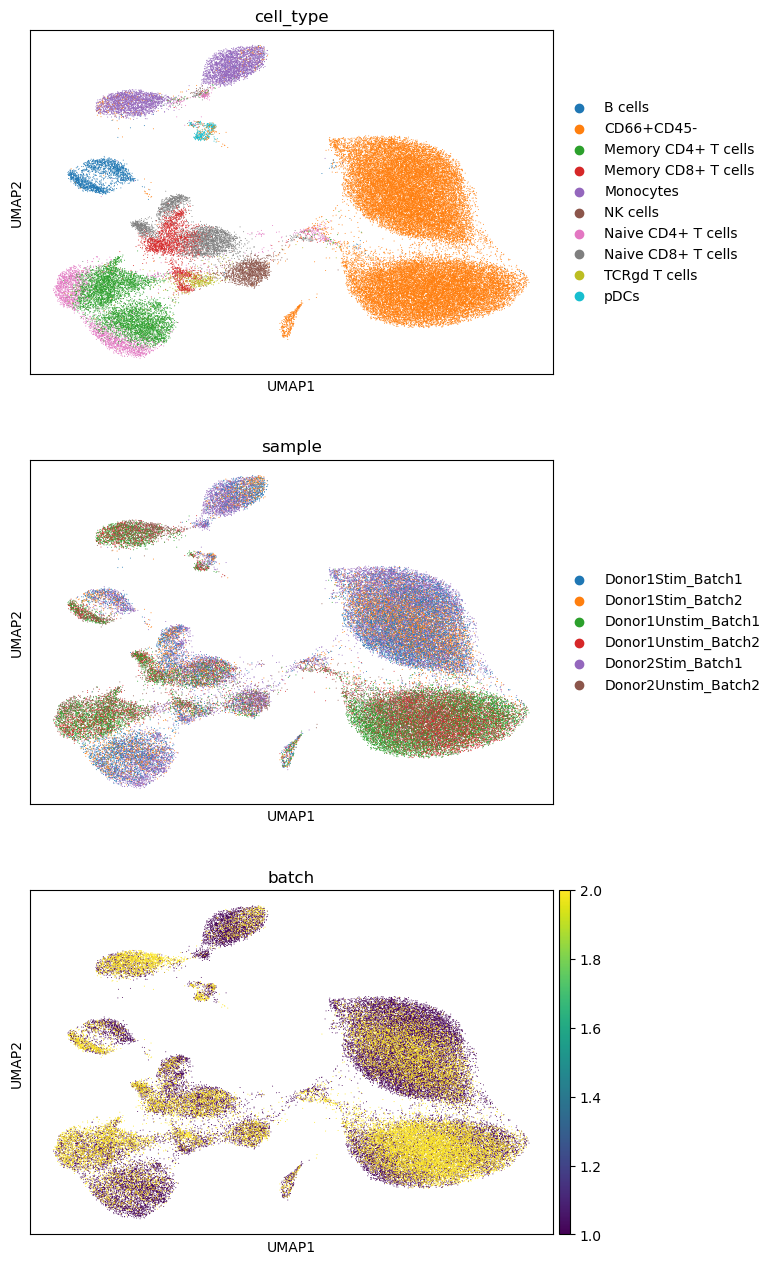

In [66]:
make_umap(i_adata_case2)